In [53]:

# Import the needed libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("data/quotes.csv")
df.columns = ["quote", "author", "tags"]

stop = stopwords.words("english")
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Dilshaan
[nltk_data]     Sandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<h2>Basic Preprocessing</h2>

In [54]:

# Removing punctuation and special characters
df["quote_clean"] = df["quote"].str.replace("[^a-zA-Z#]", " ")
df["quote_clean"] = df["quote_clean"].str.lower()

# Removing stopwords
df["quote_clean"] = df["quote_clean"].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
df["quote_clean"] = df["quote_clean"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


C:\Users\Dilshaan Sandhu\AppData\Local\Temp\ipykernel_18816\2941459702.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["quote_clean"] = df["quote"].str.replace("[^a-zA-Z#]", " ")


<h2>Create a bar graph of the most common words</h2>



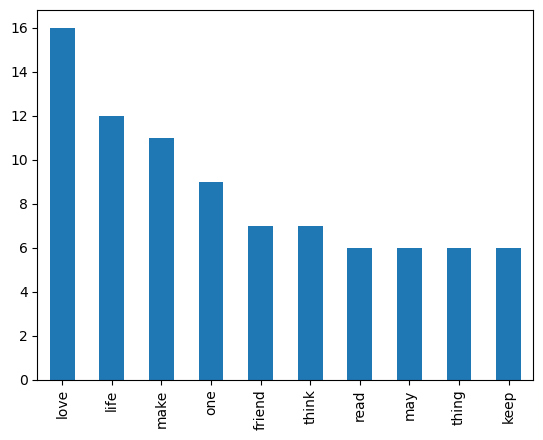

In [55]:
words = df["quote_clean"].str.lower().str.split().explode().value_counts()
words = words[:10]
words.plot.bar()
plt.show()